In [4]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Symmmetric Random Walk

Picture you have successive coin tosses, $\omega = \omega_1\omega_2\omega_3 ...$
Where $\omega_n$ is the outcome of the $n^{th}$ toss.

$X_j =
\begin{cases}
    1                & \text{if } \omega_j = H\\
    -1               & \text{if } \omega_j = T\\
\end{cases}$

If we define $M_0 = 0,$

$\begin{equation}
M_k = \sum_{j=1}^{k}X_j
\end{equation}$

In [5]:
# Parameters
M = 10 # number of simulations
t = 10 # Time

In [6]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

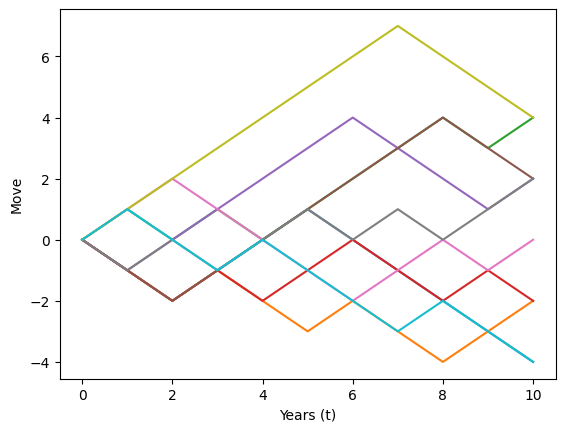

In [7]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

## Scaled Symmmetric Random Walk

To approximate a Browian Motion we can speed up time and scale down the step size.

$\begin{equation}
W^{(n)}(t) = \frac{1}{\sqrt{n}}M_{nt}
\end{equation}$

In [8]:
n=10
t=10 #time
M=10 #number of simulation

In [9]:
random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

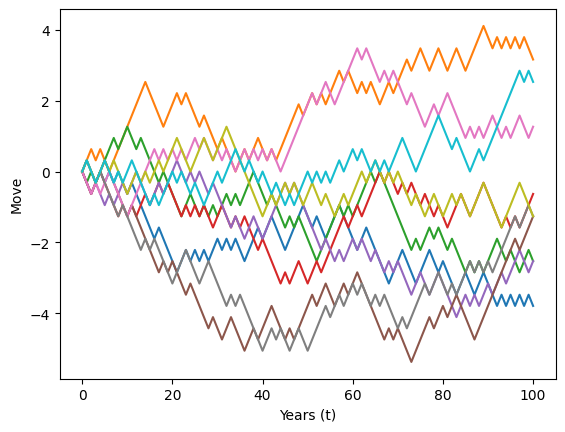

In [10]:
plt.plot(srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [11]:
n=100
t=10 #time
M=10 #number of simulation
dt=t/n #time step

In [12]:
#using normal distribution
steps = np.random.normal(0,np.sqrt(dt),size=(M,n)).T
origin=np.zeros((1,M))
bm_paths=np.concatenate([origin,steps]).cumsum(axis=0)

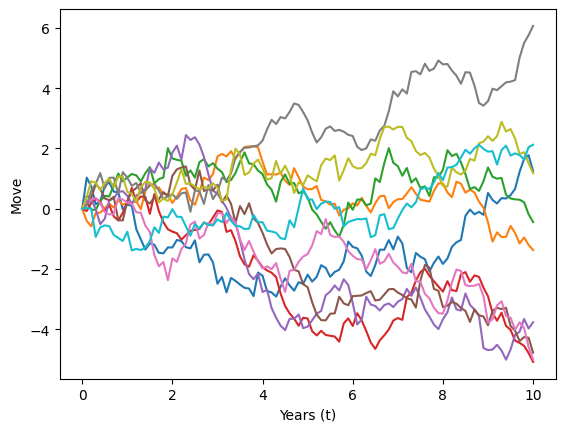

In [13]:
time=np.linspace(0,t,n+1)
tt=np.full(shape=(M,n+1),fill_value=time)
tt=tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

## simulating geometric brownian motion

In [15]:
#drift coef
mu=0.1
#number of steps
n=100
#time in year
T=1
#number of sims
M=100
#initial stock price
S0=100
#volatility
sigma=0.3

In [25]:
#simulating GBM path

dt=T/n #time step

St=np.exp(
    ((mu-sigma**2) / 2)*dt
    +sigma*np.random.normal(0,np.sqrt(dt),size=(M,n)).T #simulation for each time step
    )

St=np.vstack([np.ones(M),St]) #include an initial array of 1

St=S0*St.cumprod(axis=0)

In [26]:
time=np.linspace(0,T,n+1)

tt=np.full(shape=(M,n+1),fill_value=time).T

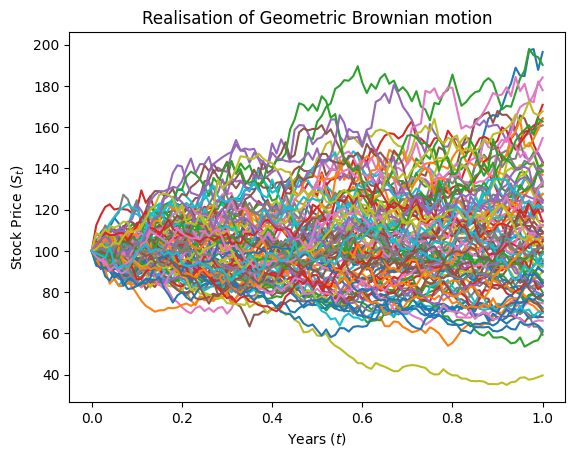

In [28]:
plt.plot(tt,St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title("Realisation of Geometric Brownian motion")
plt.show()